In [2]:
#READING CSV
import pandas as pd
from copy import deepcopy
from google.colab import drive 
drive.mount('/content/gdrive')

almacenes = pd.read_csv("/content/gdrive/MyDrive/Trabajos 7mo Ciclo/Complejidad/almacenes.csv")
alm = almacenes[['Coord X', 'Coord Y']]
nodeTypeALM = [1]*100
alm['NodeType'] = nodeTypeALM

puntos_entrega = pd.read_csv("/content/gdrive/MyDrive/Trabajos 7mo Ciclo/Complejidad/puntos_entrega.csv")
pe = puntos_entrega[['Coord X', 'Coord Y']]
nodeTypePE = [2]*5000
pe['NodeType'] = nodeTypePE

Mounted at /content/gdrive


In [3]:
newDF = pd.concat([alm, pe])

nodeTypeList = newDF[['Coord X', 'Coord Y', 'NodeType']].values.tolist()
noTypeList = newDF[['Coord X', 'Coord Y']].values.tolist()

#List to use
adyList = deepcopy(nodeTypeList)
#print(adyList)

In [4]:
#Sorting List
def orderList(list_):
    newL = sorted(list_, key=lambda y: y[1])
    newL.sort(key=lambda x: x[0])
    return deepcopy(newL)

newL = orderList(noTypeList)
newTypeList = orderList(adyList)

In [5]:
#Almacén/Punto de entrega Nodes to append
def popStuff(popList, times):
    to_return = []
    popList.reverse()
    for j in range(times):
        to_return.append(popList.pop())
    popList.reverse()
    return to_return

#Search X Coords Nodes
def searchX(tempList, tempNodeTypeList, x):
    returnList = []
    max = 0
    for i in tempList:
        if i[0] == x:
            max += 1
            returnList.append(i)
        else:
            popStuff(tempList, max)
            popped = popStuff(tempNodeTypeList, max)
            return returnList, popped

In [6]:
# Create graph
def graph(nodesList, newL_, newTypeList_):
    xList = [i for i in range(1000)]
    yList = [i for i in range(1000)]
    nodesCont = 0

    tempNoTypeList = deepcopy(newL_)
    tempTypeList = deepcopy(newTypeList_)

    for x in xList:
        smallList = []
        popped = []
        smallList, popped = searchX(tempNoTypeList, tempTypeList, x)
        for y in yList:
            ady1 = nodesCont - 1000 #left then goes clockwise
            ady2 = nodesCont - 1
            ady3 = nodesCont + 1000
            ady4 = nodesCont + 1
            # Validations - not corners
            if x == 0: ady1 = -1
            if x == 999: ady3 = -1
            if y == 0: ady2 = -1
            if y == 999: ady4 = -1

            ady0 = [ady1, ady2, ady3, ady4]

            if [x, y] in smallList:
                t = popped.pop(0)
                nodesList.append([t[0], t[1], t[2], ady0])
            else:
                nodesList.append([x, y, 0, ady0])
            
            nodesCont += 1

In [9]:
nodes = []
graph(nodes, newL, newTypeList)

In [1]:
#here

In [10]:
def print_nodes(aeaList):
    for i in range(1000):
        print(aeaList[i])
    print(len(aeaList))

#print_nodes(nodesList)
def print_corners(aeaList):
    for i in range(0, 5):
        print(aeaList[i])
        print(aeaList[-i])

print_corners(nodes)

[0, 0, 0, [-1, -1, 1000, 1]]
[0, 0, 0, [-1, -1, 1000, 1]]
[0, 1, 0, [-1, 0, 1001, 2]]
[999, 999, 0, [998999, 999998, -1, -1]]
[0, 2, 0, [-1, 1, 1002, 3]]
[999, 998, 0, [998998, 999997, -1, 999999]]
[0, 3, 0, [-1, 2, 1003, 4]]
[999, 997, 0, [998997, 999996, -1, 999998]]
[0, 4, 0, [-1, 3, 1004, 5]]
[999, 996, 0, [998996, 999995, -1, 999997]]


In [11]:
nodes_copy = deepcopy(nodes)
new_nodes = sorted(nodes_copy, key=lambda y: y[2])

In [12]:
def popStuffAndDelete(popList, times):
    to_return = []
    popList.reverse()
    for j in range(times):
        popped = popList.pop()
        del popped[3]
        del popped[2]
        to_return.append(popped)
    popList.reverse()
    return to_return

def deleteStuff(nodesList):
    for i in nodesList:
        del i[3]
        del i[2]

def separateTypes(tempNodes, x):
    max = 0
    for i in tempNodes:
        if i[2] == x:
            max += 1
        else:
            popped = popStuffAndDelete(tempNodes, max)
            return popped

In [13]:
new_nodes_copy = deepcopy(new_nodes)

normal_nodes = separateTypes(new_nodes_copy, 0)
alm_nodes = separateTypes(new_nodes_copy, 1)
ent_nodes = new_nodes_copy
deleteStuff(ent_nodes)

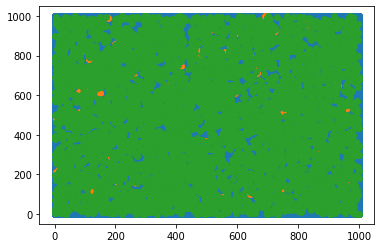

In [14]:
import matplotlib.pyplot as plt
import numpy as np

normal_np = np.array(normal_nodes)
alm_np = np.array(alm_nodes)
ent_np = np.array(ent_nodes)

plt.scatter(*zip(*normal_np))
plt.scatter(*zip(*alm_np))
plt.scatter(*zip(*ent_np))

cm = 1/2.54
plt.rcParams["figure.figsize"] = [60*cm, 30*cm]
plt.rcParams["figure.autolayout"] = True
plt.show()

In [15]:
# Making a copy of resulting graph
nodes_copy = deepcopy(nodes)

In [16]:
# BFS since all edges have the same weight (among all nodes)
def bfs(graph, s):
    n = len(graph)
    visited = [False]*n
    parent = [None]*n
    queue = [s]
    visited[s] = True

    while queue:
        u = queue.pop(0)
        node = graph[u]
        for v in node[3]:
            if v >= 0:
                if not visited[v]:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)

    return parent

In [18]:
path = bfs(nodes_copy, 0)

for i in range(5):
    print(path[i])
print(path[1000])
print(path[2000])
print(path[3000])
print(len(path))

None
0
1
2
3
0
1000
2000
1000000


In [19]:
# Dijkstra desde cada almacen a todos los puntos de entrega. BFS since all edges have the same weight

# Partir de un nodo Storage a todos los nodos Delivery
# 1. Verificar que sea Storage y hacer una lista de paths para cada nodo Delivery
# 2. Esto resultará en una lista de 5000 rutas por cada Storage (100 listas en total)

def find_route(all_routes, alm_node, ent_node):
    start_node = all_routes[ent_node] #returns parent
    #ir desde ent_node hasta alm_node con un while hasta que encuentre el nodo que necesita
    #Las rutas se obtienen recorriendo las rutas generales de manera inversa
    route = []
    route.append(ent_node)

    if start_node == alm_node: #Comprueba si son nodos adyacentes
        route.append(alm_node)
        route.reverse()
        return route

    while start_node != alm_node: #Recorre los padres desde el punto de entrega hasta el almacén (inversamente)
        route.append(start_node)
        start_node = all_routes[start_node]

    route.append(alm_node)
    route.reverse()
    return route #returns 1 route

def all_routes_from_alm(graph, alm_node):
    routes = []
    n = len(graph)
    visited = [False]*n
    parent = [None]*n
    queue = [alm_node]
    visited[alm_node] = True

    while queue:
        u = queue.pop(0)
        node = graph[u]
        for v in node[3]:
            if v >= 0:
                if not visited[v]:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)

    for i in range(n): #ent_nodes
        if graph[i][2] == 2:
            route = []
            route.append(alm_node)
            route.append(i)
            route.append(find_route(parent, alm_node, i))
            routes.append(route)

    return routes #returns 5k routes of that Storage node


def bfs_alm(graph): #Only asking to every Storage node
    routes = []
    n = len(graph)

    for i in range(n):
        if graph[i][2] == 1:
            routes.append(all_routes_from_alm(graph, i))

    return routes #returns 5k * 100 routes

In [20]:
routes = bfs_alm(nodes_copy)

In [22]:
for i in range(5):
    print(routes[i][-1])
print(len(routes))


[5214, 999678, [5214, 6214, 7214, 8214, 9214, 10214, 11214, 12214, 13214, 14214, 15214, 16214, 17214, 18214, 19214, 20214, 21214, 22214, 23214, 24214, 25214, 26214, 27214, 28214, 29214, 30214, 31214, 32214, 33214, 34214, 35214, 36214, 37214, 38214, 39214, 40214, 41214, 42214, 43214, 44214, 45214, 46214, 47214, 48214, 49214, 50214, 51214, 52214, 53214, 54214, 55214, 56214, 57214, 58214, 59214, 60214, 61214, 62214, 63214, 64214, 65214, 66214, 67214, 68214, 69214, 70214, 71214, 72214, 73214, 74214, 75214, 76214, 77214, 78214, 79214, 80214, 81214, 82214, 83214, 84214, 85214, 86214, 87214, 88214, 89214, 90214, 91214, 92214, 93214, 94214, 95214, 96214, 97214, 98214, 99214, 100214, 101214, 102214, 103214, 104214, 105214, 106214, 107214, 108214, 109214, 110214, 111214, 112214, 113214, 114214, 115214, 116214, 117214, 118214, 119214, 120214, 121214, 122214, 123214, 124214, 125214, 126214, 127214, 128214, 129214, 130214, 131214, 132214, 133214, 134214, 135214, 136214, 137214, 138214, 139214, 1402